# **Import Modules**

## *python*

In [1]:
# Import python modules
import os,sys

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._02_1_chunk import Chunking

except ImportError:
    print('Could not import module from `scripts/`.')

# **Chunking**

In [3]:
# Define DataFrame path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/filtered_complaints.csv')
plot_dir = os.path.join(os.path.dirname(os.getcwd()), 'plots/02_chunking_embedding')
df_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','processed')

In [ ]:
# Initalise class
# Load data
chunker = Chunking (df_path, plot_dir, df_dir)

Renamed 'Clean Consumer Complaint Narrative' to 'Consumer Complaint Narrative Clean' and dropped the original column.

DataFrame loaded successfully from ..\data\processed\filtered_complaints.csv


Chunking complete.

Chunked DataFrame head:


,Chunk,Chunk Length,Company,Company Public Response,Company Response To Consumer,Complaint Id,Complaint Length,Consumer Complaint Narrative,Consumer Complaint Narrative Clean,Consumer Consent Provided?,...,Date Sent To Company,Issue,Product,State,Sub-Issue,Sub-Product,Submitted Via,Tags,Timely Response?,Zip Code
0,xxxx xxxx card opened name fraudster. received...,311,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with non-monetary relief,14069121,488.0,A XXXX XXXX card was opened under my name by a...,xxxx xxxx card opened name fraudster. received...,Consent provided,...,2025-06-13,Getting a credit card,Credit card,TX,Card opened without my consent or knowledge,Store credit card,Web,Servicemember,Yes,78230
1,made mistake using wellsfargo debit card depsi...,354,WELLS FARGO & COMPANY,Company has responded to the consumer and the ...,Closed with explanation,14061897,555.0,I made the mistake of using my wellsfargo debi...,made mistake using wellsfargo debit card depsi...,Consent provided,...,2025-06-13,Managing an account,Checking or savings account,ID,Deposits and withdrawals,Checking account,Web,Unknown,Yes,83815
2,secured credit card citibank changed unsecured...,496,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with monetary relief,14047085,806.0,"Dear CFPB, I have a secured credit card with c...",secured credit card citibank changed unsecured...,Consent provided,...,2025-06-13,"Other features, terms, or problems",Credit card,NY,Other problem,General-purpose credit card or charge card,Web,Unknown,Yes,11220
3,citi reward cards. credit balance issued $8400...,443,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with explanation,14040217,1199.0,I have a Citi rewards cards. The credit balanc...,citi reward cards. credit balance issued $8400...,Consent provided,...,2025-06-12,Incorrect information on your report,Credit card,IL,Account information incorrect,General-purpose credit card or charge card,Web,Unknown,Yes,60067
4,.00 $5400.00 sends message reached credit limi...,364,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with explanation,14040217,1199.0,I have a Citi rewards cards. The credit balanc...,citi reward cards. credit balance issued $8400...,Consent provided,...,2025-06-12,Incorrect information on your report,Credit card,IL,Account information incorrect,General-purpose credit card or charge card,Web,Unknown,Yes,60067



DataFrame shape after exploding (Chunked DataFrame): (1022264, 22)
DataFrame shape before exploding: (456510, 21)

Chunked DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022264 entries, 0 to 1022263
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   Chunk                               1022264 non-null  object        
 1   Chunk Length                        1022264 non-null  int64         
 2   Company                             1022264 non-null  object        
 3   Company Public Response             1022264 non-null  object        
 4   Company Response To Consumer        1022264 non-null  object        
 5   Complaint Id                        1022264 non-null  int64         
 6   Complaint Length                    1022264 non-null  float64       
 7   Consumer Complaint Narrative        1022264 non-null  object        
 8  

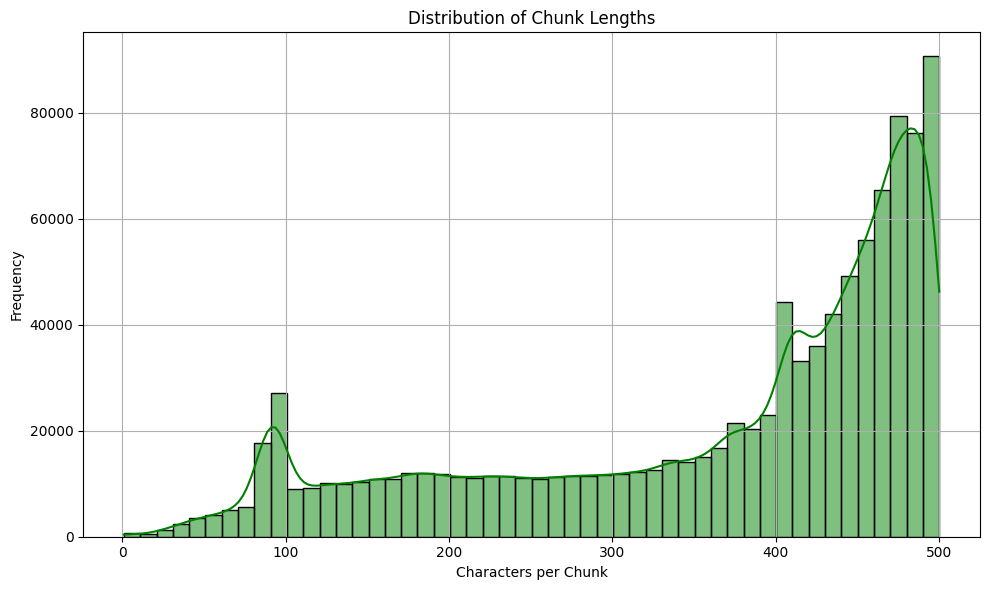


Chunked DataFrame saved to: ..\data\processed\chunked_complaints.csv


In [ ]:
# Chunking and plotting
chunker.chunk_narrative()

chunker.plot_chunk_lengths()

chunker.save_df()

# **Embedding**

In [7]:
import pandas as pd
df=pd.read_csv("../data/processed/filtered_complaints.csv")
df.head()

,Clean Consumer Complaint Narrative,Company,Company Public Response,Company Response To Consumer,Complaint Id,Complaint Length,Consumer Complaint Narrative,Consumer Consent Provided?,Consumer Disputed?,Date Received,Date Sent To Company,Issue,Product,State,Sub-Issue,Sub-Product,Submitted Via,Tags,Timely Response?,Zip Code
0,xxxx xxxx card opened name fraudster. received...,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with non-monetary relief,14069121,488.0,A XXXX XXXX card was opened under my name by a...,Consent provided,Unknown,2025-06-13,2025-06-13,Getting a credit card,Credit card,TX,Card opened without my consent or knowledge,Store credit card,Web,Servicemember,Yes,78230
1,made mistake using wellsfargo debit card depsi...,WELLS FARGO & COMPANY,Company has responded to the consumer and the ...,Closed with explanation,14061897,555.0,I made the mistake of using my wellsfargo debi...,Consent provided,Unknown,2025-06-13,2025-06-13,Managing an account,Checking or savings account,ID,Deposits and withdrawals,Checking account,Web,Unknown,Yes,83815
2,secured credit card citibank changed unsecured...,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with monetary relief,14047085,806.0,"Dear CFPB, I have a secured credit card with c...",Consent provided,Unknown,2025-06-12,2025-06-13,"Other features, terms, or problems",Credit card,NY,Other problem,General-purpose credit card or charge card,Web,Unknown,Yes,11220
3,citi reward cards. credit balance issued $8400...,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with explanation,14040217,1199.0,I have a Citi rewards cards. The credit balanc...,Consent provided,Unknown,2025-06-12,2025-06-12,Incorrect information on your report,Credit card,IL,Account information incorrect,General-purpose credit card or charge card,Web,Unknown,Yes,60067
4,bi writing dispute following charge citi credi...,"CITIBANK, N.A.",Company has responded to the consumer and the ...,Closed with monetary relief,13968411,2908.0,b'I am writing to dispute the following charge...,Consent provided,Unknown,2025-06-09,2025-06-09,Problem with a purchase shown on your statement,Credit card,TX,Credit card company isn't resolving a dispute ...,General-purpose credit card or charge card,Web,Older American,Yes,78413


In [10]:
df['Consumer Disputed?'].value_counts()

Consumer Disputed?
Unknown    434138
No          17511
Yes          4861
Name: count, dtype: int64